# TensorFlow Regression Example

## Creating Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [0]:
# y = mx + b + noise_levels
b = 10

y_true =  (2.5 * x_data ) + 15 + noise

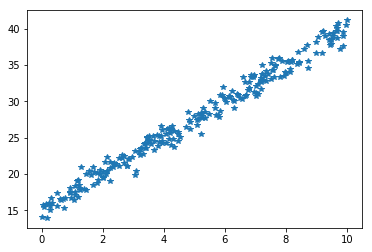

In [5]:
sample_indx = np.random.randint(len(x_data),size=(250))
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')

# Tensorflow 2.0

In [6]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
BATCH_SIZE = 1000
BATCHS = 10000

display_step = 1000
learning_rate = 0.001

In [0]:
w = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)

In [0]:
def next_batch(x_data, batch_size):
    batch_index = np.random.randint(len(x_data),size=(BATCH_SIZE))
    x_train = x_data[batch_index]
    y_train = y_true[batch_index]
    return x_train, y_train

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate= learing_rate)

In [0]:
x_train, y_train = next_batch(x_data, BATCH_SIZE)

In [37]:
y_train.reshape((-1,1)).shape

(1000, 1)

In [33]:
x_train.reshape((-1,1)).shape

(1000, 1)

In [26]:
for step in range(BATCHS):
  x_train, y_train = next_batch(x_data, BATCH_SIZE)
  with tf.GradientTape() as tape:
    y_pred = w * x_train + b
    # loss = tf.reduce_sum(tf.square(y_pred - y_train))/(BATCH_SIZE)
    loss = tf.reduce_mean(tf.square(y_pred - y_train))
  
  
  grads = tape.gradient(loss, [w, b])
  optimizer.apply_gradients(grads_and_vars=zip(grads,[w,b]))
  
  if (step + 1) % display_step == 0 or step == 0:
    print("Step : {}, loss : {} , w : {}, b : {}".format(step, loss.numpy(), w.numpy(), b.numpy()))

Step : 0, loss : 813.4712524414062 , w : 0.31691431999206543, b : 0.05517519637942314
Step : 999, loss : 20.257383346557617 , w : 3.821810245513916, b : 6.228170871734619
Step : 1999, loss : 8.363652229309082 , w : 3.309018135070801, b : 9.620268821716309
Step : 2999, loss : 4.025704383850098 , w : 2.998520851135254, b : 11.700251579284668
Step : 3999, loss : 1.9712138175964355 , w : 2.805393695831299, b : 12.976557731628418
Step : 4999, loss : 1.3898404836654663 , w : 2.6879377365112305, b : 13.758804321289062
Step : 5999, loss : 1.073419451713562 , w : 2.613929271697998, b : 14.238375663757324
Step : 6999, loss : 1.0848280191421509 , w : 2.569657564163208, b : 14.532112121582031
Step : 7999, loss : 1.0170762538909912 , w : 2.540977716445923, b : 14.71386432647705
Step : 8999, loss : 0.9608482718467712 , w : 2.5256636142730713, b : 14.82515811920166
Step : 9999, loss : 1.05859375 , w : 2.5149433612823486, b : 14.893718719482422


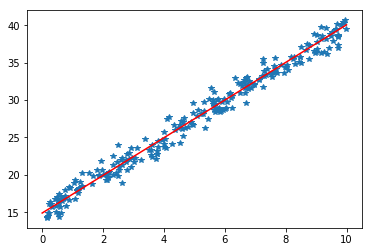

In [0]:
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')
plt.plot(x_data, w.numpy()*x_data+b.numpy(),'r')

### Using Keras Models

In [0]:
class LinearModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.dense = tf.keras.layers.Dense(
        units=1)
        # kernel_initializer=tf.zeros_initializer(),
        # bias_initializer = tf.zeros_initializer())

  def call(self,input):
    output = self.dense(input)
    return output


In [0]:
model = LinearModel()

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [20]:
for step in range(BATCHS):
  x_train, y_train = next_batch(x_data, BATCH_SIZE)
  x_train = x_train.reshape((-1,1))
  y_train = y_train.reshape((-1,1))
  with tf.GradientTape() as tape:    
    y_pred = model(x_train)
    loss = tf.reduce_mean((y_pred - y_train)**2)
  grads = tape.gradient(loss, model.variables)
  optimizer.apply_gradients(zip(grads, model.variables))
  if step%1000 == 0:
    print("Step: {} loss: {}".format(step,loss.numpy()))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Step: 0 loss: 484.9335632324219
Step: 1000 loss: 20.907081604003906
Step: 2000 loss: 8.306971549987793
Step: 3000 loss: 4.338044166564941
Step: 4000 loss: 2.01308274269104
Step: 5000 loss: 1.4498724937438965
Step: 6000 loss: 1.1431903839111328
Step: 7000 loss: 1.0200426578521729
Step: 8000 loss: 0.9427798986434937
Step: 9000 loss: 0.9625763297080994


In [0]:
w,b = model.variables

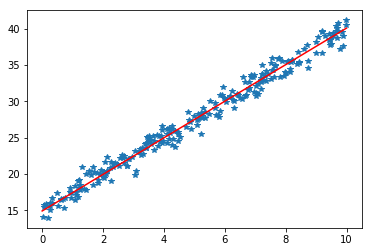

In [29]:
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')
plt.plot(x_data, w.numpy()[0]*x_data+b.numpy(),'r')

# TF Eager Execution


In [0]:
import tensorflow as tf

In [0]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [0]:
BATCH_SIZE = 1000
BATCHS = 10000

In [0]:
def next_batch(x_data, batch_size):
    batch_index = np.random.randint(len(x_data),size=(BATCH_SIZE))
    x_train = x_data[batch_index]
    y_train = y_true[batch_index]
    return x_train, y_train

**Variables**

In [0]:
w_tfe = tf.Variable(np.random.uniform())
b_tfe = tf.Variable(np.random.uniform(1,10))

**Linear regression function**

In [0]:
# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * w_tfe + b_tfe

**Lost function: MS**

In [0]:
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * BATCH_SIZE)

**Optimizer**

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

grad = tfe.implicit_gradients(mean_square_fn)

In [0]:
# Initial cost
x_train, y_train = next_batch(x_data, BATCH_SIZE)
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, x_train, y_train)),
    "W=", w_tfe.numpy(), "b=", b_tfe.numpy())

Initial cost= 301.666534424 W= 0.29334104 b= 2.6102347


**Training**

In [0]:
# Training
display_step = 100
for step in range(BATCHS):
    
    x_train, y_train = next_batch(x_data, BATCH_SIZE)
    optimizer.apply_gradients(grad(linear_regression, x_train, y_train))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, x_train, y_train)),
              "W=", w_tfe.numpy(), "b=", b_tfe.numpy())


Epoch: 0001 cost= 275.481536865 W= 0.42854565 b= 2.6336372
Epoch: 0100 cost= 16.771112442 W= 4.11131 b= 3.4798746
Epoch: 0200 cost= 16.047227859 W= 4.1926284 b= 3.7750118
Epoch: 0300 cost= 15.135506630 W= 4.155428 b= 4.045262
Epoch: 0400 cost= 14.601335526 W= 4.1137743 b= 4.309869
Epoch: 0500 cost= 12.988318443 W= 4.07434 b= 4.5675364
Epoch: 0600 cost= 13.962398529 W= 4.0381775 b= 4.8191485
Epoch: 0700 cost= 11.749617577 W= 3.9993713 b= 5.064703
Epoch: 0800 cost= 11.554651260 W= 3.9644341 b= 5.3054633
Epoch: 0900 cost= 11.580221176 W= 3.928494 b= 5.5401406
Epoch: 1000 cost= 11.125984192 W= 3.8980548 b= 5.770336
Epoch: 1100 cost= 10.007103920 W= 3.862554 b= 5.9936194
Epoch: 1200 cost= 9.616973877 W= 3.8300939 b= 6.2107058
Epoch: 1300 cost= 9.293504715 W= 3.7960896 b= 6.4219265
Epoch: 1400 cost= 9.302433968 W= 3.7648456 b= 6.6274505
Epoch: 1500 cost= 8.918160439 W= 3.7349737 b= 6.8296146
Epoch: 1600 cost= 8.196873665 W= 3.700922 b= 7.025527
Epoch: 1700 cost= 8.114662170 W= 3.6736612 b= 7

**Results**

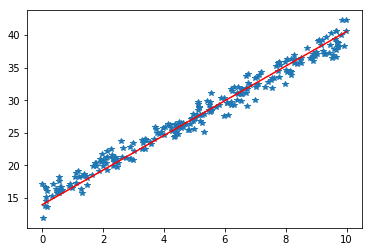

In [0]:
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')
plt.plot(x_data, w_tfe*x_data+b_tfe,'r')